The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


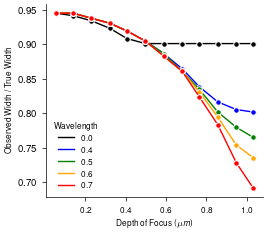

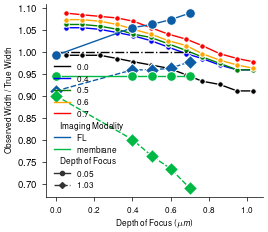

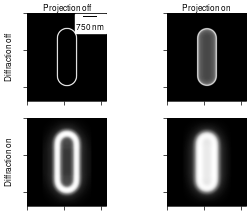

<Figure size 330x250 with 0 Axes>

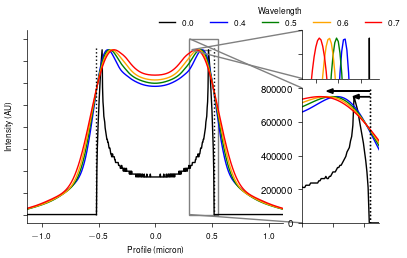

In [27]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(1, '../SyMBac/')


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import cm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition
import matplotlib
from matplotlib_scalebar.scalebar import ScaleBar
import tifffile
from microfilm.colorify import cmaps_def
import scipy
import statannot

plt.style.use(["science", 'nature'])

matplotlib.rcParams["xtick.minor.bottom"]=False
matplotlib.rcParams["xtick.top"]=False
matplotlib.rcParams["ytick.minor.left"]=False
matplotlib.rcParams["ytick.right"]=False
matplotlib.rcParams["font.size"] = 6
#matplotlib.rcParams["axes.labelpad"] = 0
matplotlib.rcParams["axes.spines.right"] = False
matplotlib.rcParams["axes.spines.top"] = False
matplotlib.rcParams["xtick.minor.visible"] = False
matplotlib.rcParams["ytick.minor.visible"] = False
matplotlib.rcParams["xtick.direction"] = "out"
matplotlib.rcParams["ytick.direction"] = "out"
matplotlib.rcParams["legend.fontsize"] = 6
matplotlib.rcParams["svg.fonttype"] = "none"
matplotlib.rcParams["xtick.labelsize"] = 6
matplotlib.rcParams["xtick.labelsize"] = 6
matplotlib.rcParams["axes.titlesize"] = 6
matplotlib.rcParams["axes.labelsize"] = 6
matplotlib.rcParams["grid.alpha"] = 0
matplotlib.rcParams["savefig.transparent"] = True

resize_amount = 1
pix_mic_conv = 0.065 / 17

all_data = pd.read_pickle("../../single_cell_projection_diffraction/all_data.pickle")

wavelength_colours = ["k", "b", "g", "orange", "r"] 

standard_cell = all_data.query("`True Width` == 1.04")


max_dof_FL = standard_cell.query("`Imaging Modality` == 'FL'")["Depth of Focus"].max()
min_dof_FL = standard_cell.query("`Imaging Modality` == 'FL'")["Depth of Focus"].min()
high_dof_wavelength_FL = standard_cell.query("`Imaging Modality` == 'FL' & `Depth of Focus` == @max_dof_FL").drop(columns = ["profile", "x axis", "ID", "filename"]).drop_duplicates()
low_dof_wavelength_FL = standard_cell.query("`Imaging Modality` == 'FL' & `Depth of Focus` == @min_dof_FL").drop(columns = ["profile", "x axis", "ID", "filename"]).drop_duplicates()

max_dof_membrane = standard_cell.query("`Imaging Modality` == 'membrane'")["Depth of Focus"].max()
min_dof_membrane = standard_cell.query("`Imaging Modality` == 'membrane'")["Depth of Focus"].min()
high_dof_wavelength_membrane = standard_cell.query("`Imaging Modality` == 'membrane' & `Depth of Focus` == @max_dof_membrane").drop(columns = ["profile", "x axis", "ID", "filename"]).drop_duplicates()
low_dof_wavelength_membrane = standard_cell.query("`Imaging Modality` == 'membrane' & `Depth of Focus` == @min_dof_membrane").drop(columns = ["profile", "x axis", "ID", "filename"]).drop_duplicates()
high_low_dof = pd.concat([high_dof_wavelength_FL, low_dof_wavelength_FL, high_dof_wavelength_membrane, low_dof_wavelength_membrane])
high_low_dof = pd.concat([high_dof_wavelength_FL, low_dof_wavelength_FL, high_dof_wavelength_membrane, low_dof_wavelength_membrane])
imshow_data = all_data.loc[high_low_dof.index]

plt.figure(figsize=(2.8,2.5))
sns.lineplot(x="Depth of Focus", y="Observed Width / True Width", hue = "Wavelength",
     data=standard_cell.query("`Imaging Modality` == 'membrane'"), palette=wavelength_colours, marker= "o", markersize=4)
#plt.title("Width = 1, Imaging Modality = Membrane")
plt.xlabel("Depth of Focus ($\mu m$)")
plt.savefig("membrane_wavelength.pdf")

plt.figure(figsize=(2.8,2.5))
sns.lineplot(x="Depth of Focus", y="Observed Width / True Width", hue = "Wavelength",
     data=standard_cell.query("`Imaging Modality` == 'FL'"), palette=wavelength_colours, marker= "o", markersize=4)
#plt.title("Width = 1, Imaging Modality = FL")
plt.xlabel("Depth of Focus ($\mu m$)")
plt.savefig("FL_wavelength.pdf")

max_dof_FL = standard_cell.query("`Imaging Modality` == 'FL'")["Depth of Focus"].max()
min_dof_FL = standard_cell.query("`Imaging Modality` == 'FL'")["Depth of Focus"].min()
high_dof_wavelength_FL = standard_cell.query("`Imaging Modality` == 'FL' & `Depth of Focus` == @max_dof_FL").drop(columns = ["profile", "x axis", "ID", "filename"]).drop_duplicates()
low_dof_wavelength_FL = standard_cell.query("`Imaging Modality` == 'FL' & `Depth of Focus` == @min_dof_FL").drop(columns = ["profile", "x axis", "ID", "filename"]).drop_duplicates()

max_dof_membrane = standard_cell.query("`Imaging Modality` == 'membrane'")["Depth of Focus"].max()
min_dof_membrane = standard_cell.query("`Imaging Modality` == 'membrane'")["Depth of Focus"].min()
high_dof_wavelength_membrane = standard_cell.query("`Imaging Modality` == 'membrane' & `Depth of Focus` == @max_dof_membrane").drop(columns = ["profile", "x axis", "ID", "filename"]).drop_duplicates()
low_dof_wavelength_membrane = standard_cell.query("`Imaging Modality` == 'membrane' & `Depth of Focus` == @min_dof_membrane").drop(columns = ["profile", "x axis", "ID", "filename"]).drop_duplicates()



high_low_dof = pd.concat([high_dof_wavelength_FL, low_dof_wavelength_FL, high_dof_wavelength_membrane, low_dof_wavelength_membrane])
plt.plot([0,0.7],[1,1], c="k", linestyle="-.")
p = sns.lineplot(x = "Wavelength", y = "Observed Width / True Width", data = high_low_dof, style = "Depth of Focus", hue = "Imaging Modality", markers = ["o", "D"], markersize=7,)
leg = p.legend_
for t in leg.texts:
    if any([x in t.get_text() for x in ["Imag", "FL", "memb", "Depth"]]):
        pass
    else:
    # truncate label text to 4 characters
        t.set_text(t.get_text()[:4])

plt.savefig("wavelength.pdf")

##00 = proj, diff
def membrane_imshow(into_subplot = False, axs = None):
    
    if not into_subplot:
        fig, axs = plt.subplots(2,2)
        mem_00, mem_10, mem_01, mem_11 = axs.flatten()
    else:
        mem_00, mem_10, mem_01, mem_11 = axs
    

    mem_00.imshow( np.load('../../single_cell_projection_diffraction/'+imshow_data.query("`Imaging Modality` == 'membrane' & Wavelength == 0 & `Depth of Focus` == @min_dof_membrane")["filename"].iloc[0])[200:-200,:], cmap="Greys_r" )

    mem_10.imshow( np.load('../../single_cell_projection_diffraction/'+imshow_data.query("`Imaging Modality` == 'membrane' & Wavelength == 0 & `Depth of Focus` == @max_dof_membrane")["filename"].iloc[0])[200:-200,:], cmap="Greys_r" )

    mem_01.imshow( np.load('../../single_cell_projection_diffraction/'+imshow_data.query("`Imaging Modality` == 'membrane' & Wavelength == 0.7 & `Depth of Focus` == @min_dof_membrane")["filename"].iloc[0])[200:-200,:], cmap="Greys_r" )

    mem_11.imshow( np.load('../../single_cell_projection_diffraction/'+imshow_data.query("`Imaging Modality` == 'membrane' & Wavelength == 0.7 & `Depth of Focus` == @max_dof_membrane")["filename"].iloc[0])[200:-200,:], cmap="Greys_r" )

    
    for ax in [mem_00, mem_10, mem_01, mem_11]:
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        
    mem_00.set_xlabel('Projection off',labelpad=2)    
    mem_00.xaxis.set_label_position('top') 
    mem_00.set_ylabel("Diffraction off")
    
    mem_10.set_xlabel("Projection on",labelpad=2)
    mem_10.xaxis.set_label_position('top') 
    
    mem_01.set_ylabel("Diffraction on")
    
    scalebar = ScaleBar(pix_mic_conv, "um")
    mem_00.add_artist(scalebar)

    if not into_subplot:
        plt.show()
        plt.savefig("membrane_imshow.pdf")
        
membrane_imshow()



profiles = []
for index, row in imshow_data.iterrows():
    profiles.append(row["profile"])

max_int = np.max(profiles)
#profiles[0] = profiles[0]/profiles[0].max() * max_int

profiles = [x/x.max() * max_int for x in profiles]

x_axes = []
for plot_profile in profiles:
    x_axis = np.arange(0,len(plot_profile),1).astype(float)
    x_axis -= x_axis.max()/2
    x_axis *= pix_mic_conv
    x_axes.append(x_axis)

imshow_data["profile"] = profiles
imshow_data["x axis"] = x_axes
imshow_data = imshow_data.explode(["profile", "x axis"])

from seaborn import move_legend
def membrane_profile_plot(into_subplot = False, ax = None):
    if not into_subplot:
        fig, ax = plt.subplots(1,1)

    sns.lineplot(x="x axis", y="profile", hue = "Wavelength",
                         data=imshow_data.query("`Imaging Modality` == 'membrane' & `Depth of Focus` == @max_dof_membrane"), palette=wavelength_colours, ax = ax)


    axins1 = inset_axes(ax, 0.5 ,0.5, "lower right") #zoomed_inset_axes(ax, 5, loc="lower center", bbox_to_anchor=(10,-100))

    mark_inset(ax, axins1, loc1=2, loc2=3, fc="none", ec="0.5")
    g = sns.lineplot(x="x axis", y="profile", hue = "Wavelength",
                         data=imshow_data.query("`Imaging Modality` == 'membrane' & `Depth of Focus` == @max_dof_membrane"), palette=wavelength_colours, ax = axins1, legend=None)
    
    move_legend(ax, (0.5,1), ncol=5)
    
    axins1.set_xlim([0.3,0.55])
    axins1.set_ylim([0*10**5, 8*10**5])
    axins1.set_xlabel(None)
    axins1.set_ylabel(None)
    axins1.set_yticklabels([])
    axins1.set_xticklabels([])
    width = imshow_data["True Width"].unique()[0]
    ax.plot([width/2,width/2], [0, 760000], c = "k", linestyle=":")
    
    axins1.plot([width/2,width/2], [0, ax.get_ylim()[1]*1.05], c = "k", linestyle=":")
    ip = InsetPosition(ax,[1.075, 0.0, 0.3, .7])
    axins1.set_axes_locator(ip)
    
    
    ax.set_xlabel("Profile (micron)")


    axins2 = inset_axes(ax, 0.5 , 0.5, "upper left") #zoomed_inset_axes(ax, 5, loc="lower center", bbox_to_anchor=(10,-100))

    ip = InsetPosition(ax,[1.075, 0.75, 0.3, 0.25])
    axins2.set_axes_locator(ip)
    
    mark_inset(ax, axins2, loc1=2, loc2=3,  fc="none", ec="0.5")
    sns.lineplot(x="x axis", y="profile", hue = "Wavelength",
                         data=imshow_data.query("`Imaging Modality` == 'membrane' & `Depth of Focus` == @max_dof_membrane"), palette=wavelength_colours, ax = axins2, legend=None)
    axins2.set_xlim([0.32, 0.49])
    axins2.set_ylim([7.48*10**5, 7.5*10**5])
    axins2.set_xlabel(None)
    axins2.set_ylabel(None)
    axins2.set_yticklabels([])
    axins2.set_xticklabels([])
    ax.plot([-width/2,-width/2], [0, 760000], c = "k", linestyle=":")

    axins1.plot([width/2,width/2], [0, ax.get_ylim()[1]], c = "k", linestyle=":")
    
    ax.set_xlim(ax.get_xlim()[0]*0.5, ax.get_xlim()[1]*0.5)
    ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1]*1.05)
    ax.set_ylabel("Intensity (AU)")
    ax.yaxis.set_ticklabels([])
    ax.set_xlabel("Profile (micron)")
    
    axins1.arrow(0.52, 7.495*10**5, -0.035, 0, head_width=27000, head_length=0.02, fc='k', ec='k', width = 0.000001)
    axins1.arrow(0.52, 7.825*10**5, -0.12, 0, head_width=27000, head_length=0.02, fc='k', ec='k', width = 0.000001)

    
    if not into_subplot:
        plt.show()
        
membrane_profile_plot()

In [2]:
all_data = pd.read_pickle("../../single_cell_projection_diffraction/all_data.pickle")


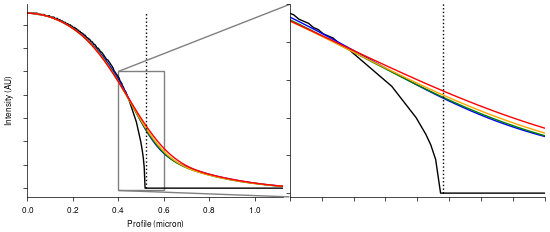

In [3]:
def FL_profile_plot(into_subplot = False, ax = None):
    if not into_subplot:
        fig, ax = plt.subplots(1,1)
    sns.lineplot(x="x axis", y="profile", hue = "Wavelength",
                         data=imshow_data.query("`Imaging Modality` == 'FL' & `Depth of Focus` == @max_dof_membrane"), palette=wavelength_colours, ax = ax, legend = None)
    plt.xlim(0,)
    width = imshow_data["True Width"].unique()[0]

    axins1 = inset_axes(ax, 0.5 ,0.5, "upper left",) #zoomed_inset_axes(ax, 5, loc="lower center", bbox_to_anchor=(10,-100))

    mark_inset(ax, axins1, loc1=3, loc2=2, fc="none", ec="0.5")
    sns.lineplot(x="x axis", y="profile", hue = "Wavelength",
                         data=imshow_data.query("`Imaging Modality` == 'FL' & `Depth of Focus` == @max_dof_membrane"), palette=wavelength_colours, ax = axins1, legend=None)
    axins1.set_xlim([0.4,0.6])
    axins1.set_ylim([-0.1*10**5, 5.*10**5])
    axins1.set_xlabel(None)
    axins1.set_ylabel(None)
    axins1.set_yticklabels([])
    axins1.set_xticklabels([])
    ax.plot([width/2,width/2], [0, 750000], c = "k", linestyle=":")
    ax.plot([-width/2,-width/2], [0, 750000], c = "k", linestyle=":")

    axins1.plot([width/2,width/2], [0, 750000], c = "k", linestyle=":")
    
    ip = InsetPosition(ax,[1.025, 0.0, 1, 1])
    axins1.set_axes_locator(ip)
    
    ax.set_xlabel("Profile (micron)")
    #plt.tight_layout()
    #plt.savefig("FL_profile.pdf",bbox_inches='tight' )
    
    ax.set_ylabel("Intensity (AU)")
    ax.yaxis.set_ticklabels([])
    ax.set_xlim(ax.get_xlim()[0]*0.5, ax.get_xlim()[1]*0.5)
    
    if not into_subplot:
        plt.show()
FL_profile_plot()

Text(0.5, 0, 'Width ($\\mu m$)')

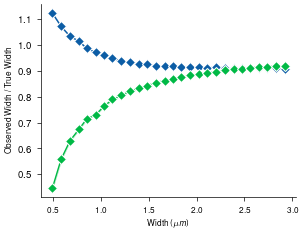

In [4]:
estimation_width_data = all_data.groupby(["True Width", "Imaging Modality", "Wavelength"], as_index=False).max("Depth of Focus").query("Wavelength == 0.6")
estimation_width_data = all_data[np.isclose(all_data["Depth of Focus"], all_data["True Width"], rtol=0.05)].query("Wavelength == 0.5")
sns.lineplot(data = estimation_width_data, x = "True Width", y = "Observed Width / True Width", hue = "Imaging Modality", marker="D", markersize=5, legend = None)
plt.xlabel("Width ($\mu m$)")


In [5]:
np.load('../../single_cell_projection_diffraction/'+imshow_data.query("`Imaging Modality` == 'membrane' & Wavelength == 0 & `Depth of Focus` == @min_dof_membrane")["filename"].iloc[0])[200:-200,:].shape

(1184, 1072)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

RADA v.s. HADA: t-test independent samples with Bonferroni correction, P_val=4.183e-15 stat=-8.324e+00


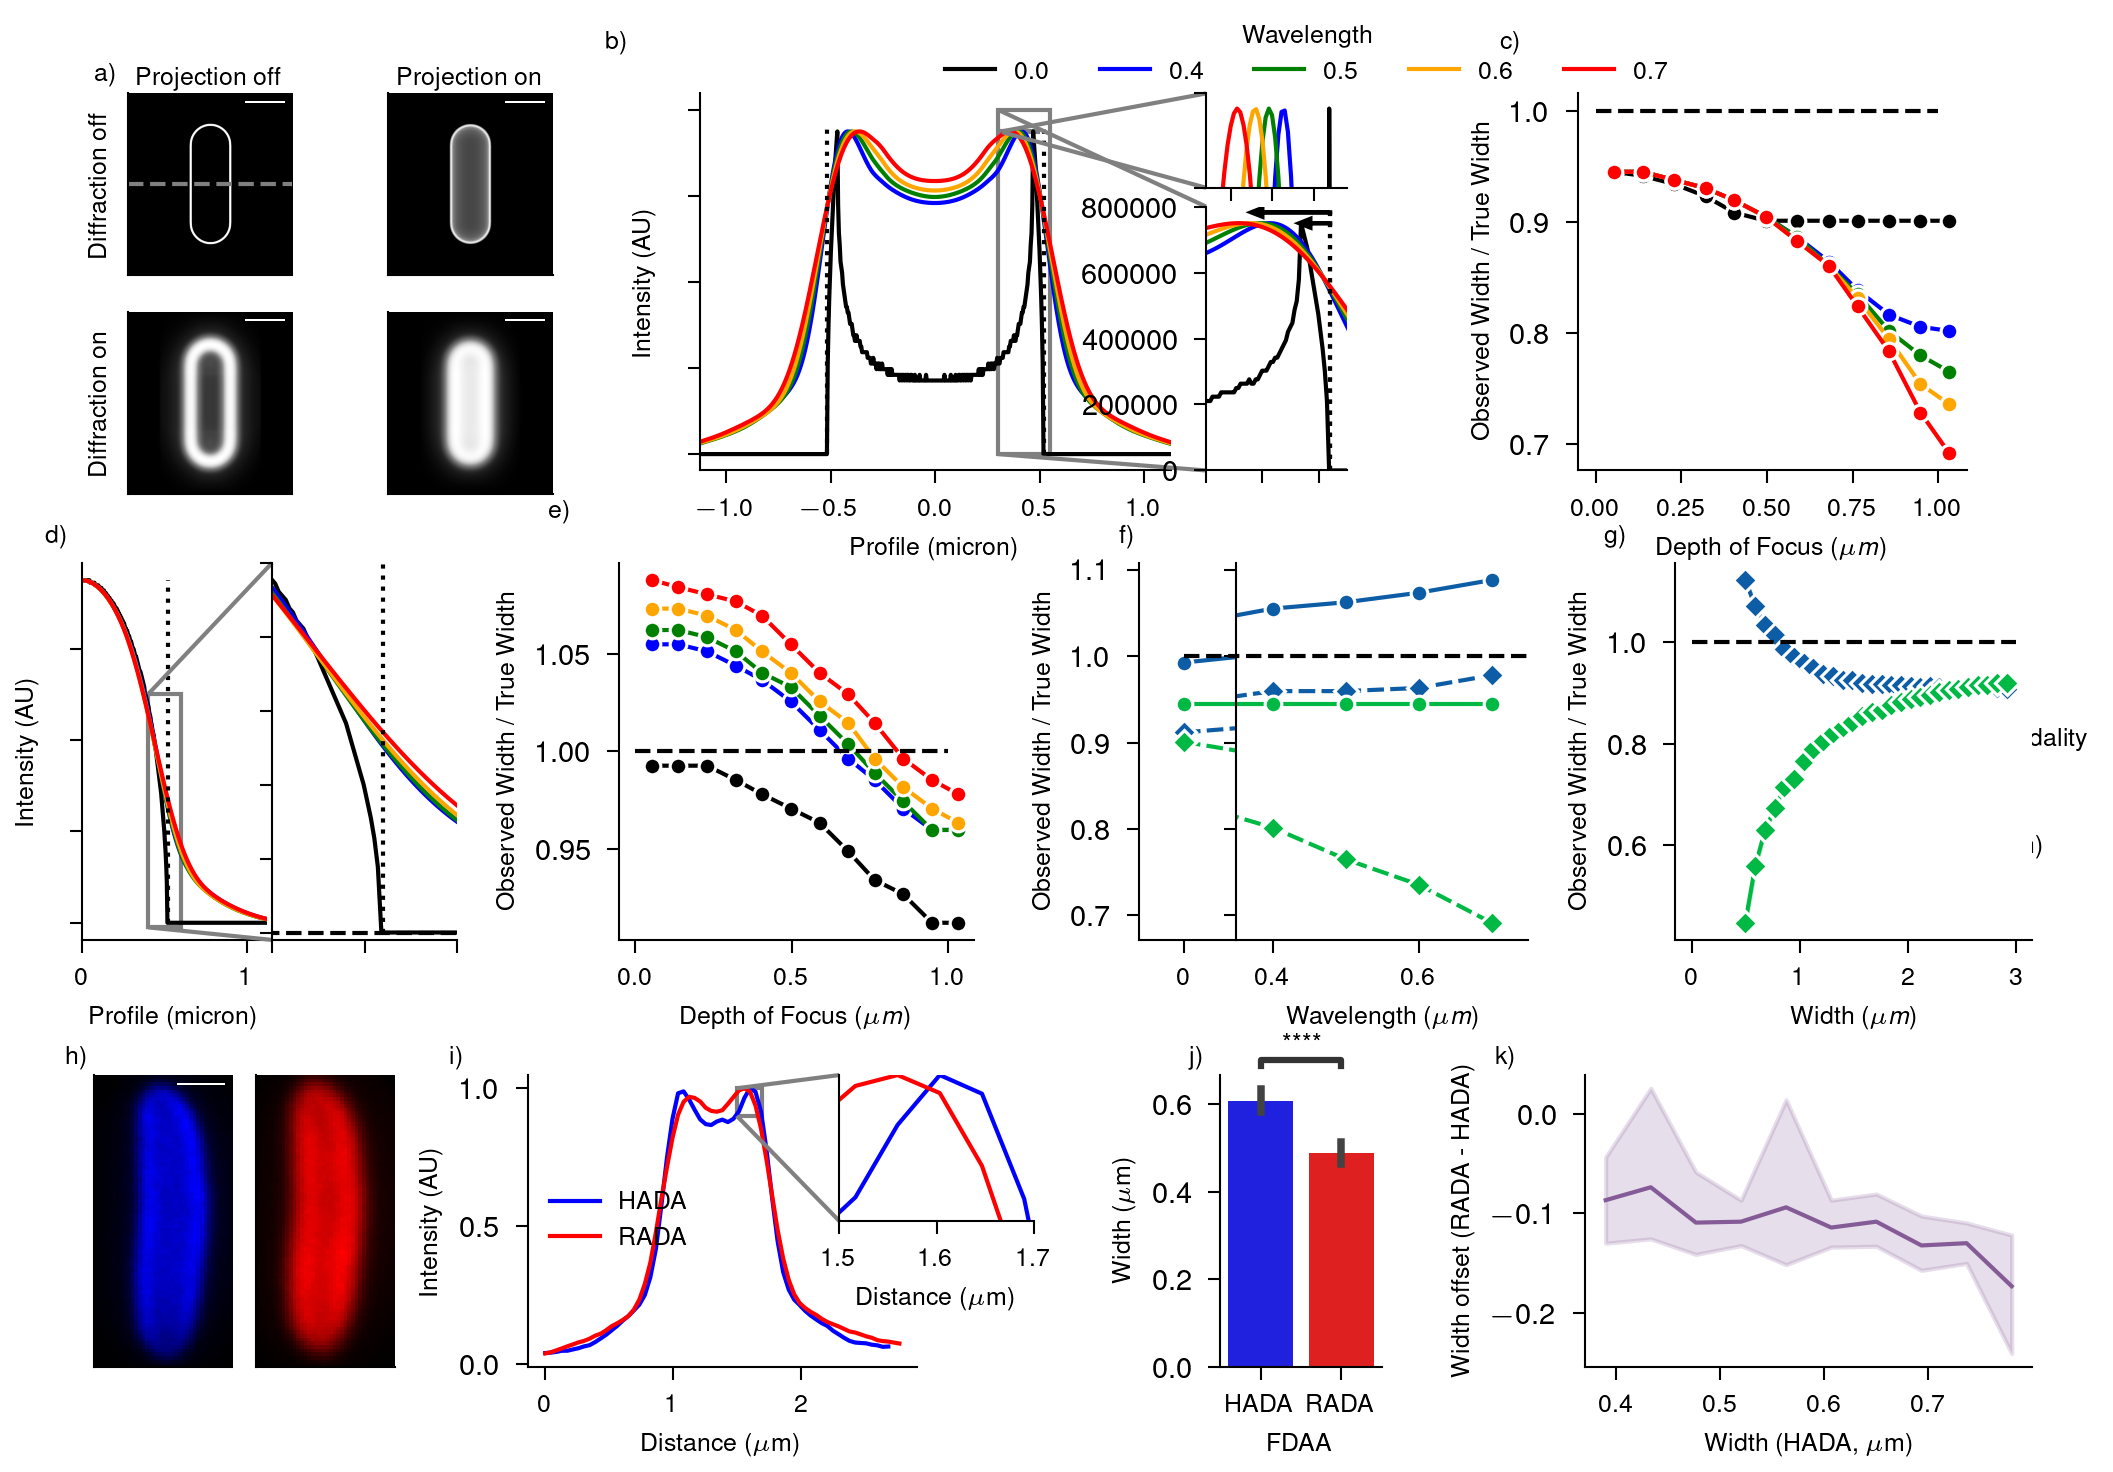

In [45]:
######### Main figure #############
cm = 1/2.54
fig = plt.subplots(figsize = (21.3*cm,14*cm), dpi = 300)
a = matplotlib.cm.get_cmap('Set2')
######### Projection diffraction grid #############
mem_00 = plt.subplot2grid((6, 60), (0, 0), colspan=8, rowspan=1)
plt.text(-.2, 1.165, 'a)', ha='left', va='top', transform=mem_00.transAxes)

mem_10 = plt.subplot2grid((6, 60), (0, 8), colspan=8, rowspan=1)
mem_01 = plt.subplot2grid((6, 60), (1, 0), colspan=8, rowspan=1)
mem_11 = plt.subplot2grid((6, 60), (1, 8), colspan=8, rowspan=1)

mem_00.imshow( np.load('../../single_cell_projection_diffraction/'+imshow_data.query("`Imaging Modality` == 'membrane' & Wavelength == 0 & `Depth of Focus` == @min_dof_membrane")["filename"].iloc[0])[200:-200,:], cmap="Greys_r" )
mem_00.plot([mem_00.get_xlim()[0], mem_00.get_xlim()[1]],  [mem_00.get_ylim()[0]/2, mem_00.get_ylim()[0]/2], linestyle="--", c = "grey")
mem_10.imshow( np.load('../../single_cell_projection_diffraction/'+imshow_data.query("`Imaging Modality` == 'membrane' & Wavelength == 0 & `Depth of Focus` == @max_dof_membrane")["filename"].iloc[0])[200:-200,:], cmap="Greys_r" )
mem_01.imshow( np.load('../../single_cell_projection_diffraction/'+imshow_data.query("`Imaging Modality` == 'membrane' & Wavelength == 0.7 & `Depth of Focus` == @min_dof_membrane")["filename"].iloc[0])[200:-200,:], cmap="Greys_r" )
mem_11.imshow( np.load('../../single_cell_projection_diffraction/'+imshow_data.query("`Imaging Modality` == 'membrane' & Wavelength == 0.7 & `Depth of Focus` == @max_dof_membrane")["filename"].iloc[0])[200:-200,:], cmap="Greys_r" )

for ax in [mem_00, mem_10, mem_01, mem_11]:
    ax.set_xticks([])
    ax.set_yticks([])

mem_00.set_xlabel('Projection off',labelpad=2)    
mem_00.xaxis.set_label_position('top') 
mem_00.set_ylabel("Diffraction off")

mem_10.set_xlabel("Projection on",labelpad=2)
mem_10.xaxis.set_label_position('top') 

mem_01.set_ylabel("Diffraction on")


for ax in [mem_00, mem_10, mem_01, mem_11]:
    ax.set_xticks([])
    ax.set_yticks([])
    scalebar = ScaleBar(pix_mic_conv, "um", length_fraction=0.25, scale_loc="none", box_alpha=0, color="white", box_color="k") # 1 micon
    ax.add_artist(scalebar)

######### Membrane trace ###########

MEMBRANE_PROFILE = plt.subplot2grid((30, 600), (0, 190), colspan=145, rowspan=9)
plt.text(-.2, 1.165, 'b)', ha='left', va='top', transform=MEMBRANE_PROFILE.transAxes)

membrane_profile_plot(into_subplot=True, ax=MEMBRANE_PROFILE)

######### Membrane DoF ###########

MEMBRANE_DOF = plt.subplot2grid((30, 300), (0, 230), colspan=60, rowspan=9)
plt.text(-.2, 1.165, 'c)', ha='left', va='top', transform=MEMBRANE_DOF.transAxes)

sns.lineplot(x="Depth of Focus", y="Observed Width / True Width", hue = "Wavelength",
     data=standard_cell.query("`Imaging Modality` == 'membrane'"), palette=wavelength_colours, marker= "o", markersize=4, legend = None)
#plt.title("Width = 1, Imaging Modality = Membrane")
plt.xlabel("Depth of Focus ($\mu m$)")
plt.plot([0,1],[1,1],color = "k", linestyle="--")
########## Cytoplasm trace #########

CYTOPLASM_PROFILE = plt.subplot2grid((30, 30), (11, 0), colspan=3, rowspan=9)
plt.text(-.2, 1.1, 'd)', ha='left', va='top', transform=CYTOPLASM_PROFILE.transAxes)

FL_profile_plot(into_subplot=True, ax = CYTOPLASM_PROFILE)
plt.plot([0,1],[1,1],color = "k", linestyle="--")


######### Cytoplasm DoF ###########

CYTOPLASM_DOF = plt.subplot2grid((30, 120), (11, 33), colspan=22, rowspan=9)
plt.text(-.2, 1.165, 'e)', ha='left', va='top', transform=CYTOPLASM_DOF.transAxes)

sns.lineplot(x="Depth of Focus", y="Observed Width / True Width", hue = "Wavelength",
     data=standard_cell.query("`Imaging Modality` == 'FL'"), palette=wavelength_colours, marker= "o", markersize=4, legend=None)
#plt.title("Width = 1, Imaging Modality = FL")
plt.xlabel("Depth of Focus ($\mu m$)")
plt.plot([0,1],[1,1],color = "k", linestyle="--")



######### Wavelength vs width ###########

wavelength_ax = plt.subplot2grid((30, 600), (11, 325), colspan=30, rowspan=9)
plt.text(-.2, 1.1, 'f)', ha='left', va='top', transform=wavelength_ax.transAxes)

p = sns.lineplot(x = "Wavelength", y = "Observed Width / True Width", data = high_low_dof, style = "Depth of Focus", hue = "Imaging Modality", markers = ["o", "D"], markersize=4, ax = wavelength_ax)
plt.legend([])
wavelength_ax.set_xlim(wavelength_ax.get_xlim()[0],0.04)
wavelength_ax.set_xticks([0])
#wavelength_ax.set_yticklabels([0])
plt.xlabel(" ")
plt.plot([0,1],[1,1],color = "k", linestyle="--")

wavelength_ax_part_2 = plt.subplot2grid((30, 600), (11, 355), colspan=90, rowspan=9)
p = sns.lineplot(x = "Wavelength", y = "Observed Width / True Width", data = high_low_dof, style = "Depth of Focus", hue = "Imaging Modality", markers = ["o", "D"], markersize=4, ax = wavelength_ax_part_2)
leg = p.legend_
for t in leg.texts:
    if any([x in t.get_text() for x in ["Imag", "FL", "memb", "Depth"]]):
        pass
    else:
        t.set_text(t.get_text()[:3])
        
    if "Depth" in t.get_text():
        t.set_text("DoF (micron)")
wavelength_ax_part_2.set_xlim(0.35,0.75)
wavelength_ax_part_2.set_yticklabels([])
wavelength_ax_part_2.set_ylabel("")
plt.xlabel("Wavelength ($\mu m$)")
plt.plot([0,1],[1,1],color = "k", linestyle="--")


############ Width dependence ##########

WIDTH_DEPENDENCE = plt.subplot2grid((30, 300), (11, 245), colspan=60, rowspan=9)
plt.text(-.2, 1.1, 'g)', ha='left', va='top', transform=WIDTH_DEPENDENCE.transAxes)

sns.lineplot(data = estimation_width_data, x = "True Width", y = "Observed Width / True Width", hue = "Imaging Modality", marker="D", markersize=4, legend = None)
plt.xlabel("Width ($\mu m$)")
plt.plot([0,3],[1,1],color = "k", linestyle="--")

move_legend(wavelength_ax_part_2, (2.,0.))

########### HADA and RADA cells ##########

HADA_IMSHOW = plt.subplot2grid((30, 300), (23, 0), colspan=25, rowspan=9)
plt.text(-.2, 1.1, 'h)', ha='left', va='top', transform=HADA_IMSHOW.transAxes)
RADA_IMSHOW = plt.subplot2grid((30, 300), (23, 25), colspan=25, rowspan=9)
for ax in [HADA_IMSHOW, RADA_IMSHOW]:
    ax.set_xticks([])
    ax.set_yticks([])

HADA_cell = np.rot90(tifffile.imread("../../FDAA_width_analysis/HADA_cell.tif"))[:,20:-20]
RADA_cell = np.rot90(tifffile.imread("../../FDAA_width_analysis/RADA_cell.tif"))[:,20:-20]

HADA_IMSHOW.imshow(HADA_cell**1.5, cmap=cmaps_def("pure_blue"))
scalebar = ScaleBar(pix_mic_conv, "um", length_fraction=0.5, scale_loc="none", box_alpha=0, color="white", box_color="k") # 1 micon
HADA_IMSHOW.add_artist(scalebar)

RADA_IMSHOW.imshow(RADA_cell**1.5, cmap=cmaps_def("pure_red"))
scalebar = ScaleBar(pix_mic_conv, "um", length_fraction=0.5, scale_loc="none", box_alpha=0, color="white", box_color="k") # 1 micon
HADA_IMSHOW.add_artist(scalebar)




########### HADA and RADA profile ##############

HADA_line = np.load("../../FDAA_width_analysis/HADA_line.npy")
RADA_line = np.load("../../FDAA_width_analysis/RADA_line.npy")

HADA_RADA_PROFILE = plt.subplot2grid((30, 600), (23, 137), colspan=120, rowspan=9)
HADA_RADA_PROFILE.plot(np.arange(len(HADA_line[10:-5]))*0.065/1.5, HADA_line[10:-5]/HADA_line.max(), c="b", label="HADA")
HADA_RADA_PROFILE.plot(np.arange(len(RADA_line[10:-5]))*0.065/1.5, RADA_line[10:-5]/RADA_line.max(), c = "r", label = "RADA")
#HADA_RADA_PROFILE.set_yticks([])
plt.legend()
plt.text(-.2, 1.1, 'i)', ha='left', va='top', transform=HADA_RADA_PROFILE.transAxes)
plt.xlabel("Distance ($\mu$m)")
plt.ylabel("Intensity (AU)")
axins1 = inset_axes(HADA_RADA_PROFILE, 0.5 ,0.5, "upper left",) #zoomed_inset_axes(ax, 5, loc="lower center", bbox_to_anchor=(10,-100))

mark_inset(HADA_RADA_PROFILE, axins1, loc1=3, loc2=2, fc="none", ec="0.5")


axins1.set_xlabel(None)
axins1.set_ylabel(None)
axins1.set_yticks([])
#axins1.set_xticklabels([])


axins1.plot(np.arange(len(HADA_line[10:-5]))*0.065/1.5, HADA_line[10:-5]/HADA_line.max(), c="b", label="HADA")
axins1.plot(np.arange(len(RADA_line[10:-5]))*0.065/1.5, RADA_line[10:-5]/RADA_line.max(), c = "r", label = "RADA")
axins1.set_xlim(1.5,1.7)
axins1.set_ylim(0.9,1)

ip = InsetPosition(HADA_RADA_PROFILE,[0.8, 0.5, 0.5, 0.5])
axins1.set_axes_locator(ip)
plt.xlabel("Distance ($\mu$m)")
########## WIDTH BARPPLOT ###############
barplot_data = pd.read_pickle("../../FDAA_width_analysis/barplot_data.pickle")
width_data = pd.read_pickle("../../FDAA_width_analysis/plotting_data.pickle")

WIDTH_BARPLOT = plt.subplot2grid((30, 300), (23, 175), colspan=25, rowspan=9)
plt.text(-.2, 1.1, 'j)', ha='left', va='top', transform=WIDTH_BARPLOT.transAxes)

stat, pvalue = scipy.stats.ttest_ind(width_data["RADA"], width_data["HADA"])
pvalue
sns.barplot(data=barplot_data, y = "value", x = "variable", errorbar=('ci', 99), ax=WIDTH_BARPLOT, palette=["blue", "red"], order = ["HADA", "RADA"])
statannot.add_stat_annotation(
    WIDTH_BARPLOT,
    data=barplot_data, y = "value", x = "variable",
    box_pairs=[
        (("HADA"), ("RADA")),
    ],
    test="t-test_ind",
    text_format="star",
    loc="outside"
)
plt.ylabel("Width ($\mu$m)")
plt.xlabel("FDAA")

########### DIFFERENCE IN WIDTH ############
WIDTH_DIFF = plt.subplot2grid((30, 30), (23, 23), colspan=7, rowspan=9)
plt.text(-.2, 1.1, 'k)', ha='left', va='top', transform=WIDTH_DIFF.transAxes)

sns.lineplot(data = width_data.query("`HADA`< 0.8"), x = "HADA", y = "RADA - HADA", errorbar=('ci', 99), c="C4")
plt.xlabel("Width (HADA, $\mu$m)")
plt.ylabel("Width offset (RADA - HADA)")

plt.savefig("figure_2.svg")


In [43]:
len(barplot_data.query("variable == 'RADA'"))

137